In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
#import xgboost as xgb


load the dataset

In [ ]:
# house_price_dataset = sklearn.datasets.load_boston()
house_price_dataset = load_boston()


In [ ]:
print(house_price_dataset)

In [ ]:
# loading the dataset to a pandas dataFrame
house_price_dataframe=pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_price_dataframe

In [ ]:
# adding target(house price) attribudes/column to the dataFrame
house_price_dataframe['PRICE']=house_price_dataset.target
house_price_dataframe

In [ ]:
# checking the missing values
house_price_dataframe.isnull().sum()

In [ ]:
# statistical measures of dataset
house_price_dataframe.describe().T

Ubderstanding the correlation between various features in the dataset

Type of correlation
1. positive correlation 
2. negative correlation

In [ ]:
correlation=house_price_dataframe.corr()
correlation

<AxesSubplot:>

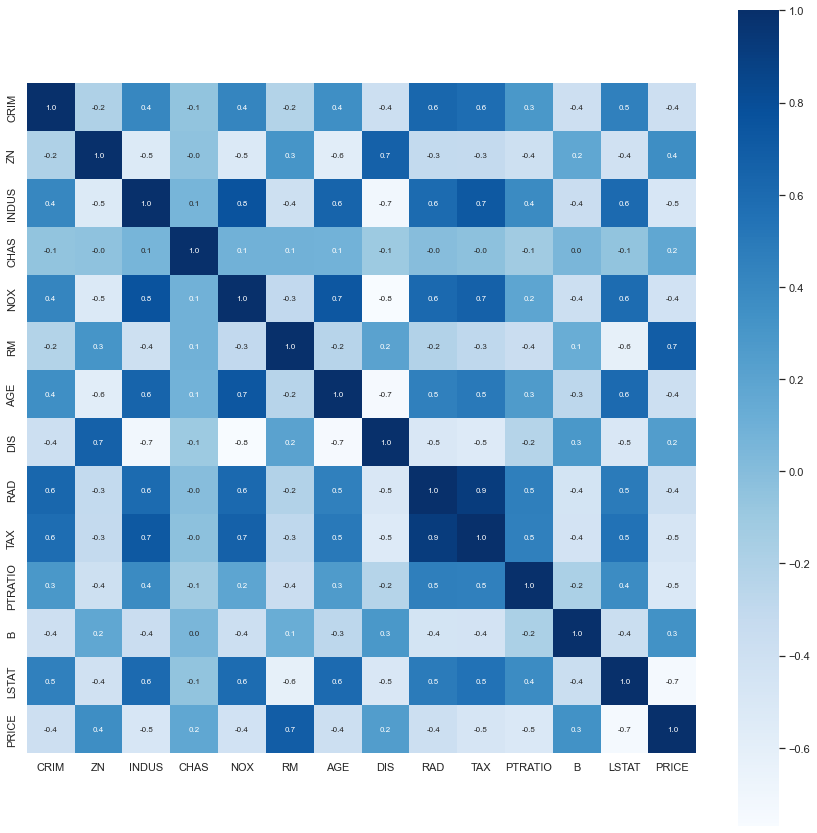

In [45]:
# constracting a heatmap to understand the correlation
sns.set(style='white')
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='Blues')